# Tutorial for building an electrolyte simulation

The notebook is entirely general, and can in principle create any combination of electrolytes and additives from the molecules in the [JCESR Molecules](https://next-gen.materialsproject.org/molecules/jcesr) database.

Let's load all electrolyte data in the database:

In [2]:
from elecChemDev.search import elyte
db = elyte()

Retrieving MoleculesDoc documents:   0%|          | 0/24989 [00:00<?, ?it/s]

Print all molecules:

In [3]:
db.df

,elemComb,natoms,formula,mass,charge,spin,mpid,svg,Atoms
hash,,,,,,,,,
75b1e02e65c6c40391a6969bfea3ebd1,AlCClH,10,C2H5AlCl2,126.943538,0,1,mol-24289,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('Al', [0.149124, 0.113872, 0.002104], in..."
3ee9163bdb0037ee10270a9913500821,AlCFHO,45,C12H16AlF12O4,479.218376,-2,2,mol-1145588,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('Al', [-1.0131344907, 0.0217249543, -1.7..."
b68bb37980ae0027c55544fa6009b15f,AlCFHO,45,C12H16AlF12O4,479.218376,-1,1,mol-1145586,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('Al', [-1.1343939593, -0.2425788403, -1...."
9ee57f72cf4d12bd8de9dfb5b90639c6,AlCFHO,45,C12H16AlF12O4,479.218376,0,2,mol-1145582,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('Al', [-1.1956983432, -0.3914441091, -1...."
8a65f983165927a35a101940c75ed529,AlCFHO,45,C12H4AlF24O4,695.103214,-2,2,mol-1145592,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('Al', [0.0020995964, -0.0086992691, 0.00..."
...,...,...,...,...,...,...,...,...,...
a246fc3743f198839899b3d2940d2721,NS,8,N4S4,184.268000,0,1,mol-45509,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('S', [0.009312, -1.626033, 0.799505], in..."
0187121e3dbedf17600e11fa996353c2,OS,10,O6S4,224.234000,0,1,mol-27093,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('S', [0.545206, 0.788526, 0.011481], ind..."
2ddd68580b6b12b43a68f01716d6ef57,P,4,P4,123.895048,0,1,mol-50586,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('P', [0.493633, 0.589222, -1.119799], in..."


This is a long list. Let us organize the molecules by the chemical elements they comprise:

In [4]:
db.df['elemComb'].unique()

array(['AlCClH', 'AlCFHO', 'AlCFO', 'AlClMg', 'AlHO', 'BCCaFHNO',
       'BCCaFHO', 'BCFH', 'BCFHMgN', 'BCFHMgNO', 'BCFHMgO', 'BCFHMgOS',
       'BCFHN', 'BCFHNO', 'BCFHNOZn', 'BCFHNZn', 'BCFHO', 'BCFHOSZn',
       'BCFHOZn', 'BCFHZn', 'BCFO', 'BCH', 'BCHMg', 'BCHN', 'BCHNO',
       'BCHNS', 'BCHO', 'BCHOSi', 'BCHZn', 'BCMgO', 'BCO', 'BCaF', 'BCaH',
       'BF', 'BFMg', 'BFZn', 'BH', 'BHMg', 'BHO', 'BHZn', 'BN', 'Be',
       'Br', 'BrCClHN', 'BrCClHNO', 'BrCClHNS', 'BrCClHO', 'BrCClHS',
       'BrCFHN', 'BrCFHNO', 'BrCFHNS', 'BrCFHO', 'BrCFHS', 'BrCHN',
       'BrCHNO', 'BrCHNOS', 'BrCHNS', 'BrCHO', 'BrCHOS', 'BrCHS', 'BrCa',
       'BrMg', 'BrZn', 'CCaFHNOS', 'CCaHNSi', 'CCl', 'CClF', 'CClFH',
       'CClFHN', 'CClFHNO', 'CClFHNS', 'CClFHO', 'CClFHS', 'CClH',
       'CClHMgO', 'CClHN', 'CClHNO', 'CClHNOP', 'CClHNOS', 'CClHNS',
       'CClHO', 'CClHOP', 'CClHOS', 'CClHOSi', 'CClHP', 'CClHS', 'CClHSi',
       'CClN', 'CClNO', 'CClO', 'CF', 'CFH', 'CFHMgNOP', 'CFHMgNOS',
       'CFHMgNOS

Let's select all molecules containing C, H, O  with either 10 or 15 atoms, and all molecules containing F, P:

In [5]:
db.df[
    (db.df['elemComb']=='CHO')*(db.df['natoms']==10)+
    (db.df['elemComb']=='CHO')*(db.df['natoms']==15)+
    (db.df['elemComb']=='FP')
    ]

,elemComb,natoms,formula,mass,charge,spin,mpid,svg,Atoms
hash,,,,,,,,,
a608be5ff2d8e3ddc4c3dc41618c4bd0,CHO,10,C3H6O,58.080000,0,1,mol-27056,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('C', [-0.664718, -0.29627, -0.354428], i..."
108041f15909a011a7360ba216208fcb,CHO,10,C3H6O,58.080000,0,1,mol-1915,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('O', [2e-06, 1.401164, -1.8e-05], index=..."
f7bf017514e1c45a6cb809fd5185aa0d,CHO,10,C3H6O,58.080000,0,1,mol-28265,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('C', [-1.51363, -0.099517, 0.148969], in..."
8c58e41a6b6851fe6fa7aa9686855a81,CHO,10,C3H6O,58.080000,0,1,mol-26536,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('C', [0.547262, -0.727772, -3.1e-05], in..."
10ac82e5a01b88e6236e56ad33729e6c,CHO,10,C3H6O,58.080000,0,1,mol-23796,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('C', [0.118338, 0.032271, -3e-06], index..."
d3ebd9a5895c40a3793e5bc92e2d3f23,CHO,10,C2H6O2,62.068000,0,1,mol-43979,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('O', [-0.510263, -0.52634, -0.034057], i..."
071046f4c519d2441e5ce8ccb7d683fe,CHO,10,C2H6O2,62.068000,0,1,mol-1902,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('O', [1.399707, 0.597601, -0.050273], in..."
8cc5a6471286a03ba76f87b56628684f,CHO,10,C4H4O2,84.074000,0,1,mol-30530,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('C', [0.67573, -0.780899, -0.000133], in..."
02cd3adb17e5c150e105cce7efa6a464,CHO,10,C3H4O3,88.062000,0,1,mol-190518,"<?xml version=""1.0""?>\n<svg version=""1.1"" id=""...","(Atom('C', [0.851364, 1e-06, 1.5e-05], index=0..."


For this example, we will pick the EC (88.062) and EMC (104.105) solvent molecules and (PF6) as a counterion 

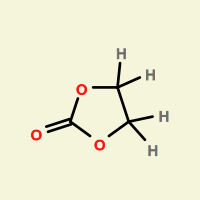

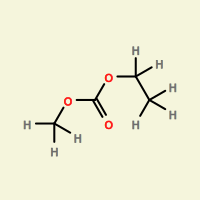

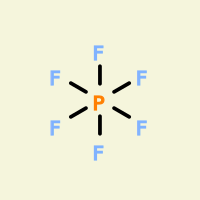

In [6]:
sel_molecs = ['02cd3adb17e5c150e105cce7efa6a464', '5ac14b0150f720ec0b3c723645eebe66', '85d223581769d2d337d38c1e8617f696']
db.show_pics(sel_molecs)

In [8]:
from ase import Atoms
from elecChemDev.build import pack_mols
from elecChemDev.view import view_atoms

mols = db.get_molecs(sel_molecs, field='Atoms')
mols.append(Atoms('Li'))
config = pack_mols(db=mols,
                   Nmols=[50,50,10,10],
                   cell=[1,1,1,90,60,45],
                   dens=0.7, distance=2.3, fct={'Li':0.1})
view_atoms(config)

100%|██████████| 120/120 [00:44<00:00,  2.71it/s]


NGLWidget()